In [1]:
% matplotlib inline
import torch 
import torch.nn.functional as F
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.set_default_tensor_type('torch.FloatTensor')

m = 10
learning_rate = 0.01
iterations = 400  #default 10000
#print_every_iter = 100
#beta = 500 #coefficient for the regularization term in the loss expression, is set to be 1000 in section 3.1
#n1 = 1000 #number of points in (0,1)^m
#n2 = 100  #number of points on the border of (0,1)^m
#n3 = 100  #number of points used for evaluating the error

# Define our deep Ritz network model
class DeepRitzNet(torch.nn.Module):
    def __init__(self, m):
        super(DeepRitzNet, self).__init__()
        self.linear1 = torch.nn.Linear(m,m)
        self.linear2 = torch.nn.Linear(m,m)
        self.linear3 = torch.nn.Linear(m,m)
        self.linear4 = torch.nn.Linear(m,m)
        self.linear5 = torch.nn.Linear(m,m)
        self.linear6 = torch.nn.Linear(m,m)
        
        self.linear7 = torch.nn.Linear(m,1)
    
    def forward(self, x):
        y = x
        y = y + F.relu(self.linear2(F.relu(self.linear1(y))))
        y = y + F.relu(self.linear4(F.relu(self.linear3(y))))
        y = y + F.relu(self.linear6(F.relu(self.linear5(y))))
        output = F.relu(self.linear7(y))
        return output

In [2]:
# Draw plots of approximate solutions
def draw_graph(mod):
    #note that this is the test and it is done on a finer mesh!!!!!!!!!!!
    points = np.arange(-1, 1, 0.01)
    xs, ys = np.meshgrid(points, points)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    xl, yl = xs.size()
    z = np.zeros((xl, yl))
    for i in range(xl):
        for j in range(yl):      
            re = np.zeros(m)
            re[0] = xs[i, j]
            re[1] = ys[i, j]
            re = torch.tensor(re)        
            z[i, j] = mod(re.float()).item()# + U_groundtruth(re)
    
    plt.imshow(z, cmap=cm.hot)
    plt.colorbar()
    
    plt.savefig("loss_1.eps")
    plt.show()


In [3]:
# U_groundtruth = 1/4*(x^2+y^2)-1/4
# take in a (m,) tensor (x, y, ...)
def U_groundtruth(t):
    #re = 0
    re = (t[0] ** 2 + t[1] ** 2 - 1).item() / 4
    return re

In [4]:
#gamma = 100
model = DeepRitzNet(m)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#in_error_iter = [] #record the error in Omega every print_every_iter=100 times
#on_error_iter = [] #record the error on the border of Omega every print_every_iter=100 times

#mm = 1
points = np.arange(-1, 1, 0.1)
xs, ys = np.meshgrid(points, points)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xl, yl = xs.size()
                
lr1 = 0.01
lr2 = 0.005
optimizer1 = torch.optim.Adam(model.parameters(), lr=lr1)
optimizer2 = torch.optim.Adam(model.parameters(), lr=lr2)
#ccc = 1

# Training
for k in range(10):
    loss = torch.zeros(1)
    for i in range(xl):
        for j in range(yl):        
            x_input = np.zeros(m)
            x_input[0] = xs[i, j]
            x_input[1] = ys[i, j]
            if x_input[0] ** 2 + x_input[1] ** 2 < 1:
                x_input = torch.tensor(x_input).float()
                y = model(x_input)
                
                x1 = torch.zeros(m)
                x2 = torch.zeros(m)
                x1[0] = 0.0001
                x2[1] = 0.0001
                x_input_1 = x_input.float() + x1
                x_input_2 = x_input.float() + x2
                x_input_3 = x_input.float() - x1
                x_input_4 = x_input.float() - x2
                x_input_grad_1 = (model(x_input_1) - y) / 0.0001
                x_input_grad_2 = (model(x_input_2) - y) / 0.0001
                x_input_2_grad_x = (model(x_input_1) + model(x_input_3) - 2 * y) / 0.0001**2
                x_input_2_grad_y = (model(x_input_2) + model(x_input_4) - 2 * y) / 0.0001**2

                loss += 0.5 * ((x_input_2_grad_x) ** 2 + (x_input_2_grad_y) ** 2) - y
                
    loss /= (xl * yl)
    

    #print loss
    print(k, " epoch, loss: ", loss.data[0].numpy())


    
    #and step the optimizer
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    loss.backward()
    if k < 270:
        optimizer1.step()
    else:
        optimizer2.step()

(0, ' epoch, loss: ', array(1.599946, dtype=float32))
(1, ' epoch, loss: ', array(2.114274, dtype=float32))
(2, ' epoch, loss: ', array(2.5143905, dtype=float32))
(3, ' epoch, loss: ', array(2.3431737, dtype=float32))
(4, ' epoch, loss: ', array(2.1312344, dtype=float32))
(5, ' epoch, loss: ', array(1.2720032, dtype=float32))
(6, ' epoch, loss: ', array(0.79070497, dtype=float32))
(7, ' epoch, loss: ', array(0.52272165, dtype=float32))
(8, ' epoch, loss: ', array(877.1403, dtype=float32))
(9, ' epoch, loss: ', array(1.0895745, dtype=float32))


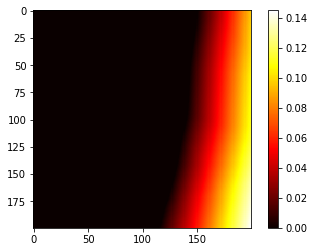

In [5]:
draw_graph(model)

In [12]:
ys

tensor([[-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
        [-9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01,
         -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01, -9.0000e-01],
        [-8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01,
         -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01, -8.0000e-01],
        [-7.0000e-01, -7.0000e-01, -7.0000e-01, -7.0000e-01, -7.0000e-01,
         -7.0000e-01, -7.0000e-01, 